# Generic notebook for GeneLab DESeq2 analysis
Input file are un-normalized counts from GeneLab and a csv with experimental design. Analysis of GLDS-274 used as example.

In [1]:
library(DESeq2)

Warning message:
“package ‘DESeq2’ was built under R version 4.0.3”
Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.0.3”
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
“package ‘BiocGenerics’ was built under R version 4.0.5”
Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, past

In [2]:
cts <- round(as.matrix(read.csv('combined_counts.csv',sep=",",check.names=FALSE,row.names=1)))
head(cts)

,UMRR_1_GG,UMRR_2_GG,UMRR_3_GG,LVR_1_GG,LVR_2_GG,LVR_3_GG,UMRR_1_GL,UMRR_2_GL,UMRR_3_GL,LVR_1_GL,LVR_2_GL,LVR_3_GL
ENSMUSG00000102851.1,0,1,0,0,0,0,0,1,0,0,0,0
ENSMUSG00000025902.13,0,0,0,2,0,0,0,0,0,2,0,0
ENSMUSG00000098104.1,9,15,21,7,3,1,1,3,1,2,0,0
ENSMUSG00000033845.13,43,47,37,74,58,37,40,39,32,62,49,31
ENSMUSG00000025903.14,12,15,17,41,70,84,13,13,13,33,63,76
ENSMUSG00000033813.15,35,44,44,19,51,5,26,30,31,11,35,5


In [9]:
coldata <- read.csv('samples.csv', row.names=1)
coldata$RNA <- factor(coldata$RNA)
coldata$Pipeline <- factor(coldata$Pipeline)
coldata$RNA_Pipeline <- factor(coldata$RNA_Pipeline)
coldata

,RNA,Pipeline,RNA_Pipeline
,<fct>,<fct>,<fct>
UMRR_1_GG,UMRR,GeneGlobe,UMRRGeneGlobe
UMRR_2_GG,UMRR,GeneGlobe,UMRRGeneGlobe
UMRR_3_GG,UMRR,GeneGlobe,UMRRGeneGlobe
LVR_1_GG,LVR,GeneGlobe,LVRGeneGlobe
LVR_2_GG,LVR,GeneGlobe,LVRGeneGlobe
LVR_3_GG,LVR,GeneGlobe,LVRGeneGlobe
UMRR_1_GL,UMRR,GeneLab,UMRRGeneLab
UMRR_2_GL,UMRR,GeneLab,UMRRGeneLab
UMRR_3_GL,UMRR,GeneLab,UMRRGeneLab


In [10]:
all(rownames(coldata) %in% colnames(cts))

[1] TRUE

In [11]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [12]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ RNA_Pipeline)
dds

converting counts to integer mode



class: DESeqDataSet 
dim: 18855 12 
metadata(1): version
assays(1): counts
rownames(18855): ENSMUSG00000102851.1 ENSMUSG00000025902.13 ...
  ERCC-00170 ERCC-00171
rowData names(0):
colnames(12): UMRR_1_GG UMRR_2_GG ... LVR_2_GL LVR_3_GL
colData names(3): RNA Pipeline RNA_Pipeline

In [13]:
keep <- rowSums(counts(dds)) > 0
dds <- dds[keep,]

In [14]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [15]:
vsd <- vst(dds, blind=FALSE)

In [16]:
sampleDists <- dist(t(assay(vsd)))

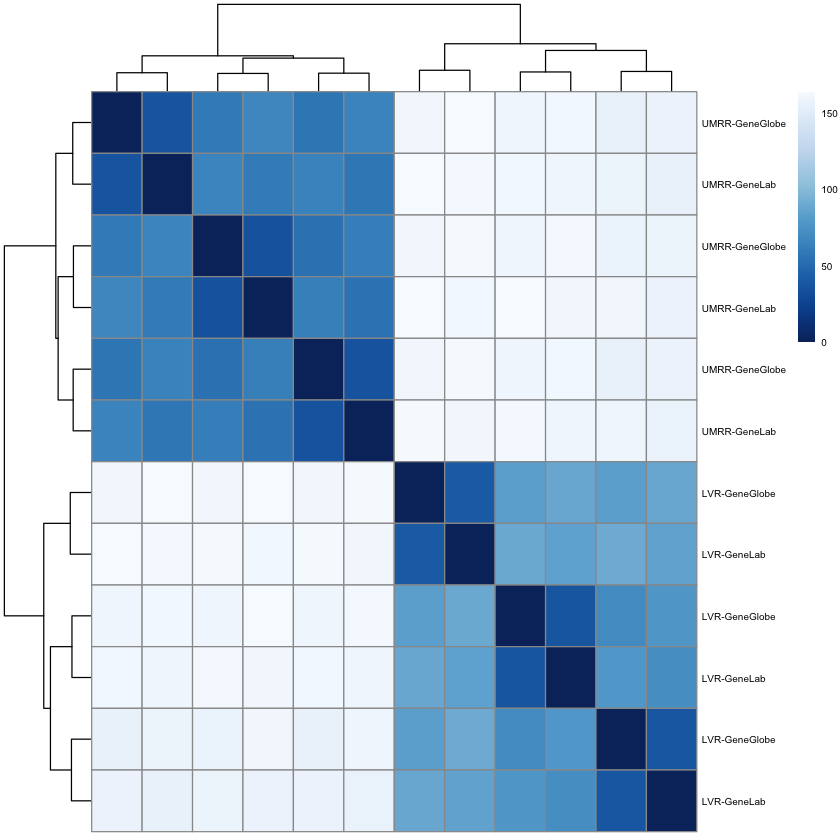

In [17]:
library("pheatmap")
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$RNA, vsd$Pipeline, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors,fontsize = 6)

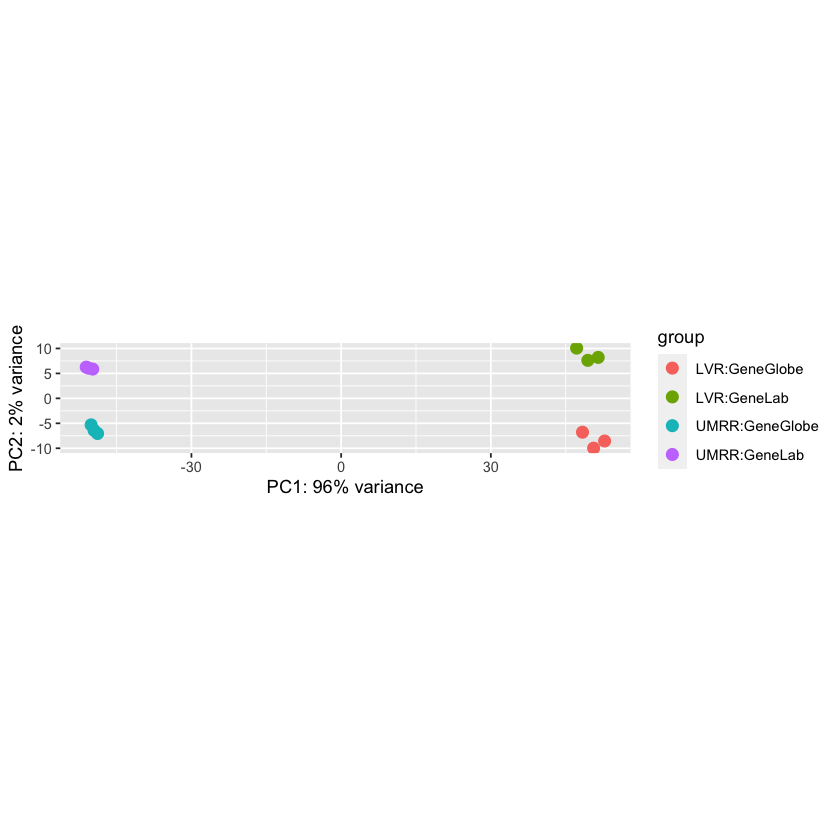

In [18]:
plotPCA(vsd, intgroup=c("RNA","Pipeline"))

In [19]:
res = results(dds, alpha=0.05, lfcThreshold=0.1,
              contrast=c("RNA_Pipeline","UMRRGeneGlobe","UMRRGeneLab"))

In [20]:
summary(res)


out of 18855 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.10 (up)    : 109, 0.58%
LFC < -0.10 (down) : 15, 0.08%
outliers [1]       : 1, 0.0053%
low counts [2]     : 8773, 47%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



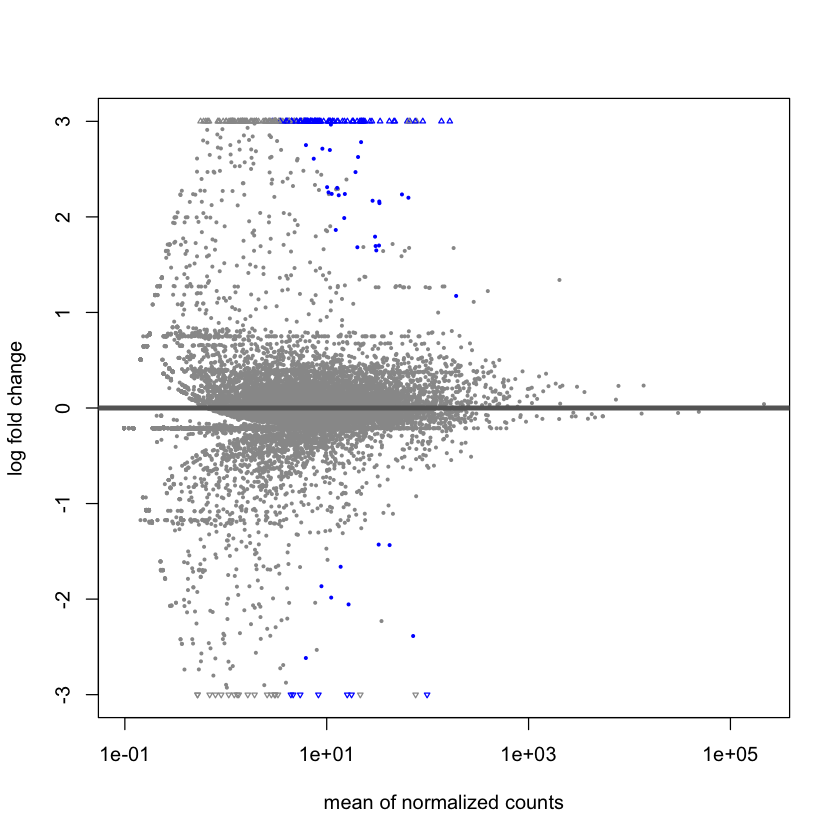

In [22]:
plotMA(res, ylim=c(-3,3))

In [23]:
head(res)

log2 fold change (MLE): RNA_Pipeline UMRRGeneGlobe vs UMRRGeneLab 
Wald test p-value: RNA_Pipeline UMRRGeneGlobe vs UMRRGeneLab 
DataFrame with 6 rows and 6 columns
                        baseMean log2FoldChange     lfcSE       stat     pvalue
                       <numeric>      <numeric> <numeric>  <numeric>  <numeric>
ENSMUSG00000102851.1   0.0980734     -0.2117625  4.407463 -0.0253575 0.97976977
ENSMUSG00000025902.13  0.3933680      0.0000000  4.407463  0.0000000 1.00000000
ENSMUSG00000098104.1   3.9187475      2.9933332  0.959574  3.0152276 0.00256786
ENSMUSG00000033845.13 48.0804088     -0.0201334  0.266442  0.0000000 1.00000000
ENSMUSG00000025903.14 50.5639573     -0.0384324  0.577859  0.0000000 1.00000000
ENSMUSG00000033813.15 24.7677879      0.2848920  0.612828  0.3017031 0.76287842
                           padj
                      <numeric>
ENSMUSG00000102851.1         NA
ENSMUSG00000025902.13        NA
ENSMUSG00000098104.1   0.168095
ENSMUSG00000033845.13  1.000000
ENS

In [24]:
write.csv(res, 'GeneGlobe_vs_GeneLab_UMRR.csv')